# Diet prediction on Indian food

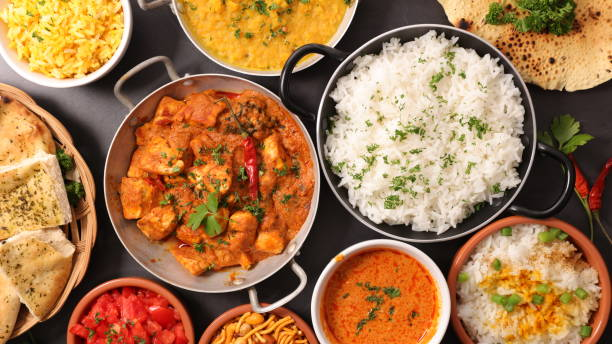

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset : https://www.kaggle.com/nehaprabhavalkar/indian-food-101

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


### Loadthe dataset

In [ ]:
df = pd.read_csv('../input/indian-food-101/indian_food.csv')
df=df.replace(-1,np.nan)
df=df.replace('-1',np.nan)
df

In [ ]:
df.shape

The dataset consists of about 255 Indian dishes and 9 columns associated with each of them.

The 9 columns are as follows:-

name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

All the observations in this notebook will be based on these 255 dishes. There are many more dishes in Indian Cuisine!

In [ ]:
df.describe()

### Proportion of Vegetarian and Non-Vegetarian dishes

In [ ]:
pie_df = df.diet.value_counts().reset_index()
pie_df.columns = ['diet','count']
fig = px.pie(pie_df, values='count', names='diet', title='Proportion of Vegetarian and Non-Vegetarian dishes',
             color_discrete_sequence=['green', 'red'])
fig.show()

#### Observation :
Vegetarian dishes consists 88.6% out of all the diets(Ofcourse higly imbalanced dependent variable).

#### Fun fact : India is ranked top in the world with 38% of the total population being vegetarians

### Number of dishes based on regions

In [ ]:
reg_df = df.region.value_counts().reset_index()
reg_df.columns = ['region','count']
reg_df = reg_df.sample(frac=1)
fig = px.bar(reg_df,x='region',y='count',title='Number of dishes based on regions',
             color_discrete_sequence=['#416219'])
fig.show()

### Number of dishes based on courses of meal 

In [ ]:
course_df = df.course.value_counts().reset_index()
course_df.columns = ['course','count']
course_df = course_df.sample(frac=1)
fig = px.bar(course_df,x='course',y='count',title='Number of dishes based on courses of meal',
             color_discrete_sequence=['#AB63FA'])
fig.show()

Observation :
About 129 dishes are preferably eaten as a main course

#### Fun fact : The very favourite Chicken Tikka Masala, a popular dish in India, is not Indian. It was invented in Glasgow, Scotland!

### Proportion of Flavor Profiles


In [ ]:
pie_df = df.flavor_profile.value_counts().reset_index()
pie_df.columns = ['flavor','count']
fig = px.pie(pie_df, values='count', names='flavor', title='Proportion of Flavor Profiles',
             color_discrete_sequence=['#FF7F0E', '#00B5F7','#AB63FA','#00CC96'])
fig.show()

#### Observation :
More than 50% of the dishes are spicy in flavor

#### Fun fact : India is the largest producer of spices in the world. No country in the world produces as many varieties of spices as India.


### Ingredients used in Indian desserts

In [ ]:
dessert_df  = df[df['course']=='dessert'].reset_index()

ingredients = []
for i in range(0,len(dessert_df)):
    text = dessert_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 500, height = 500, colormap = 'seismic'
                      ,background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()


#### Observation :
Most commonly used ingredients in making Indian sweets are Sugar, Ghee, Milk, Rice

### Ingredients used in North-Indian cuisine

In [ ]:
north_df = df[df['region']=='North'].reset_index()

ingredients = []
for i in range(0,len(north_df)):
    text = north_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, colormap = 'winter',
                      background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

### Dishes

In [ ]:
wordCloud = WordCloud(
    background_color='White',colormap = 'seismic',
    max_font_size = 50).generate(' '.join(df['name']))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [ ]:
def state_infograph(statename, title) : 
    new_df = df[df['state']== statename]

    total_dishes = new_df.shape[0]

    course_df = new_df['course'].value_counts().reset_index()
    course_df.columns = ['course','num']

    diet_df = new_df['diet'].value_counts().reset_index()
    diet_df.columns = ['diet','num']
    
#     flavor_df = new_df['prep_time'].value_counts().reset_index()
#     flavor_df.columns = ['Flavor','num']

    prep_time_df = new_df['prep_time'].value_counts().reset_index()
    prep_time_df.columns = ['prep_time', 'num']

    fig = make_subplots(
        rows=2, cols=3,subplot_titles=('Total Dishes','Dishes by Courses','Dishes by Preparation time', '',''),
        specs=[[{'type': 'indicator'},{'type': 'bar','rowspan': 2},{'type': 'bar','rowspan': 2}],
              [ {'type': 'pie'} , {'type': 'pie'}, {'type': 'pie'}]])

    fig.add_trace(go.Indicator(
        mode = 'number',
        value = int(total_dishes),
        number={'font':{'color': '#270082','size':50}},
    ),row=1, col=1)


    fig.add_trace(go.Bar(x=course_df['course'],y=course_df['num'], marker={'color': 'blue'}, 
                         text=course_df['num'],name='dishes by courses',textposition ='auto'),row=1, col=2)

    fig.add_trace(go.Pie(labels=diet_df['diet'], values=diet_df['num'],textinfo='percent',
                         marker= dict(colors=['#00bd0d','#fc0303'])),row=2, col=1)

    fig.add_trace(go.Bar(
        x=prep_time_df['prep_time'],y=course_df['num'],marker={'color': '#fc0335'}, text=course_df['num'],
        name='flavors by courses',textposition ='auto'),row=1, col=3)

    fig.update_layout(title_text= title,template='plotly',title_x=0.5)

    return fig.show()

### West Bengal Food - Mini Infograph

In [ ]:
state_infograph('West Bengal', 'West Bengal food infograph')

### Punjab Infograph

In [ ]:
state_infograph('Punjab', 'Punjab food infograph')

### Histogram for preperation time

In [ ]:
plt.figure(figsize=(14,7))
sns.distplot(df['prep_time'],color='red')
plt.title("Histogram for preparation time",fontsize=24)
plt.show()

### In the above histogram we can see some outliers, lets handle them before moving ahead.

In [ ]:
# Handling outliers for prep_time 

# as our data is skewed so we will compute the Interquantile range to calculate the boundaries 
IQR=df['prep_time'].quantile(0.75)-df['prep_time'].quantile(0.25)
lower_bridge=df['prep_time'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['prep_time'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

#### Extreme outliers
lower_bridge=df['prep_time'].quantile(0.25)-(IQR*3)
upper_bridge=df['prep_time'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

df.loc[df['prep_time']>=50,'prep_time']=50


plt.figure(figsize=(14,8))
sns.distplot(df['prep_time'],color='red')
plt.title("Histogram for prep time after handling outliers",fontsize=24)
plt.show()


### Histogram for cook time

In [ ]:
plt.figure(figsize=(14,8))
sns.distplot(df['cook_time'],color='seagreen')
plt.title("Histogram for cook time",fontsize=24)
plt.show()


## Lets start building Model

### Data Preprocessing

In [ ]:
df.isna().sum()

In [ ]:
food_vocab = set()

for ingredients in df['ingredients']:
    for food in ingredients.split(','):
        if food.strip().lower() not in food_vocab:
            food_vocab.add(food.strip().lower())

In [ ]:
food_vocab

In [ ]:
food_columns = pd.DataFrame()

for i, ingredients in enumerate(df['ingredients']):
    for food in ingredients.split(','):
        if food.strip().lower() in food_vocab:
            food_columns.loc[i, food.strip().lower()] = 1

food_columns = food_columns.fillna(0)

In [ ]:
food_columns

In [ ]:
df = df.drop(['name', 'ingredients'], axis=1)

In [ ]:
{column: list(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object'}

In [ ]:
df[['flavor_profile', 'state', 'region']] = df[['flavor_profile', 'state', 'region']].replace('-1', np.NaN)

In [ ]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

df = onehot_encode(
    df,
    ['flavor_profile', 'course', 'state', 'region'],
    ['f', 'c', 's', 'r']
)

In [ ]:
df

In [ ]:
df[['prep_time', 'cook_time']] = df[['prep_time', 'cook_time']].replace(-1, np.NaN)

In [ ]:
df

In [ ]:
df['prep_time'] = df['prep_time'].fillna(df['prep_time'].mean())
df['cook_time'] = df['cook_time'].fillna(df['cook_time'].mean())

In [ ]:
label_encoder = LabelEncoder()

df['diet'] = label_encoder.fit_transform(df['diet'])

In [ ]:
{index: label for index, label in enumerate(label_encoder.classes_)}

In [ ]:
y = df['diet']

X = df.drop('diet', axis=1)
X_food = pd.concat([X, food_columns], axis=1)

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X_food = scaler.fit_transform(X_food)

In [ ]:
X_food

### Spliting the data into test and train set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_food_train, X_food_test, y_food_train, y_food_test = train_test_split(X_food, y, train_size=0.7, random_state=42)

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=40, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=5000, batch_size=64)


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)


In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()